# Idea: Finding the least busy hour of whatsapp group.
1. import the file
2. get the data
3. find a list of time and dates
4. strip it to only time is available
5. get the hour
6. convert it to 24 hours format
7. plot a frequency graph of time based in hours
8. **if want to do more then make moving graph of how it has been changing with time.**

example of time stamps
    
    9:40 PM = 21
    
    11:09 PM = 23

    9:40 AM = 9
    
    11:09 AM = 11

In [24]:
#importing regex for searching dates
import re

#importing collections moudule importig counter for counting hour frequency
from collections import Counter
import collections

#top plot the graphs
import matplotlib.pyplot as plt

In [35]:
#opening the file.
raw_messages = open('Data.txt',encoding = 'utf-8')
listed_messages = list(raw_messages)

In [36]:
# extracting timestamps from messages
def list_of_times(list1):
    time_list = []
    for i in list1:
        time_list = time_list +re.findall(r'\d:\d\d PM|\d\d:\d\d PM|\d:\d\d AM|\d\d:\d\d AM',i)
    return time_list


In [37]:
#list of timestamps in AM/PM format
time_list = list_of_times(listed_messages)
# time_list

In [38]:
#converting to 24 hour format and returning only hours(takng out minutes)
#formats of time are
    #12:09 AM
    #2:09 AM
    #12:09 PM
    #2:09 PM
def whole_number_hours(time_list):
    hours_24 = []
    for i in time_list:
        if "AM" in i:
            if len(i) == 7:#why equals to 7? it beasuse length of 9:00 AM is 7 and of 12:00 PM is not 7.
                hours_24.append(int(i[0]))
                
            #accounting for 12.30AM to append 0
            elif len(i) != 7 and int(i[:2]) == 12:
                hours_24.append(int(i[:2])-12)
                
                
            else:
                hours_24.append(int(i[:2]))
        if "PM" in i:
            if len(i) == 7:
                hours_24.append(int(i[0]) + 12)
            elif len(i) != 7 and int(i[:2]) == 12:
                hours_24.append(int(i[:2]))
            else:
                hours_24.append(int(i[:2]) + 12)
    return hours_24

In [39]:
whole_hours = whole_number_hours(time_list)

In [42]:
dictionary_2 = Counter(whole_hours)
dictionary = dict(Counter(whole_hours))
od = collections.OrderedDict(sorted(dictionary.items()))
od

OrderedDict([(0, 2039),
             (1, 340),
             (2, 40),
             (4, 1),
             (5, 1),
             (6, 3),
             (7, 53),
             (8, 191),
             (9, 558),
             (10, 1662),
             (11, 2379),
             (12, 2669),
             (13, 1295),
             (14, 2337),
             (15, 2586),
             (16, 665),
             (17, 688),
             (18, 938),
             (19, 1690),
             (20, 1256),
             (21, 1292),
             (22, 1537),
             (23, 3245)])

<function matplotlib.pyplot.show(close=None, block=None)>

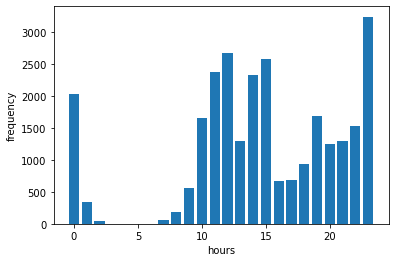

In [43]:
hours = list(dictionary.keys())
frequency = list(dictionary.values())

#plotting the graphs using matplotlib
plt.bar(hours,frequency)
plt.ylabel('frequency')
plt.xlabel('hours')
plt.show

# what furthur can be done
1. make a time varying graph as well, like is it changing with as the dates are movign farward. 

In [44]:
busiest_hour = dictionary_2.most_common(1)
least_busy = dictionary_2.most_common()
least_busy

[(23, 3245),
 (12, 2669),
 (15, 2586),
 (11, 2379),
 (14, 2337),
 (0, 2039),
 (19, 1690),
 (10, 1662),
 (22, 1537),
 (13, 1295),
 (21, 1292),
 (20, 1256),
 (18, 938),
 (17, 688),
 (16, 665),
 (9, 558),
 (1, 340),
 (8, 191),
 (7, 53),
 (2, 40),
 (6, 3),
 (5, 1),
 (4, 1)]